In [49]:
import nltk
import pandas as pd
import re  
import os
import numpy as np
import seaborn as sns; sns.set()

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [50]:

file_path = "C:\\Users\\dvjr2\\Google Drive\\Documents\\Syracuse\\IST_736_TextMining\\HW\\003\\FedPapersCorpus"
count_vectorizer = CountVectorizer(input = 'filename', analyzer = 'word', stop_words = 'english', lowercase = True)
count_vectorizer_02 = CountVectorizer(input = 'filename', analyzer = 'word', lowercase = True)

In [51]:
file_list = []
essay_list = []
for item in os.listdir(file_path):
    
    file_list.append(file_path + "\\" + item)  
    essay_list.append(item)
    
print(file_list[0])
print(essay_list[0])

C:\Users\dvjr2\Google Drive\Documents\Syracuse\IST_736_TextMining\HW\003\FedPapersCorpus\dispt_fed_49.txt
dispt_fed_49.txt


In [52]:
CV = count_vectorizer.fit_transform(file_list)
CV2 = count_vectorizer_02.fit_transform(file_list)

columns = count_vectorizer.get_feature_names()
fed_df = pd.DataFrame(CV.toarray(), columns = columns)

columns = count_vectorizer_02.get_feature_names()
fed_df_02 = pd.DataFrame(CV2.toarray(), columns = columns)
#fed_df['Essay'] = essay_list

print(fed_df.shape)
print(fed_df_02.shape)

(85, 8449)
(85, 8720)


In [53]:
fed_df.head()

,000,10,11,12,128,13,136,13th,14,15,...,yield,yielding,yoke,yokes,york,young,zaleucus,zeal,zealand,zealous
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,2,1,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,1,0,0


In [54]:
fed_df_02.head()

,000,10,11,12,128,13,136,13th,14,15,...,yokes,york,you,young,your,yourselves,zaleucus,zeal,zealand,zealous
0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,2,0,1,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,0,0


In [55]:
def toDrop(df, threshold):

    fed_df = df
    #threshold = 100 # threshold for drop
    to_drop = [] # store indexes needed to be dropped
    to_drop =  [i for i in range (len(fed_df.columns)-1) if sum(fed_df.iloc[:,i]) < threshold]  
    
    return to_drop

In [56]:
to_drop = toDrop(fed_df, 100)
to_drop_02 = toDrop(fed_df_02, 200)

print(fed_df.shape[1] - len(to_drop))
print(fed_df_02.shape[1] - len(to_drop_02))

92
110


In [57]:
# drop columns that don't meet threshold
fed_df.drop(fed_df.columns[to_drop],axis=1,inplace=True)
fed_df_02.drop(fed_df_02.columns[to_drop_02],axis=1,inplace=True)

print(fed_df.shape)  # check size of vecorization after
print(fed_df_02.shape)

(85, 92)
(85, 110)


In [58]:
final_df = fed_df.iloc[:,0:].apply(lambda x : x/len(fed_df)) # frequency of words
final_df['Essay'] = essay_list
final_df.head()

,america,authority,body,case,cases,causes,circumstances,citizens,common,congress,...,states,subject,time,union,united,view,war,york,zealous,Essay
0,0.011765,0.023529,0.000000,0.035294,0.011765,0.000000,0.011765,0.000000,0.011765,0.000000,...,0.000000,0.011765,0.011765,0.000000,0.000000,0.023529,0.0,0.023529,0.0,dispt_fed_49.txt
1,0.000000,0.000000,0.023529,0.035294,0.000000,0.000000,0.035294,0.000000,0.011765,0.000000,...,0.011765,0.000000,0.035294,0.000000,0.000000,0.023529,0.0,0.023529,0.0,dispt_fed_50.txt
2,0.023529,0.070588,0.000000,0.011765,0.023529,0.000000,0.000000,0.047059,0.035294,0.000000,...,0.035294,0.011765,0.011765,0.011765,0.035294,0.035294,0.0,0.023529,0.0,dispt_fed_51.txt
3,0.000000,0.011765,0.000000,0.035294,0.000000,0.000000,0.035294,0.011765,0.011765,0.011765,...,0.105882,0.023529,0.058824,0.000000,0.047059,0.047059,0.0,0.023529,0.0,dispt_fed_52.txt
4,0.023529,0.023529,0.000000,0.047059,0.035294,0.011765,0.047059,0.023529,0.000000,0.011765,...,0.188235,0.070588,0.058824,0.023529,0.035294,0.000000,0.0,0.023529,0.0,dispt_fed_53.txt


In [59]:
final_df_02 = fed_df_02.iloc[:,0:].apply(lambda x : x/len(fed_df_02)) # frequency of words
final_df_02['Essay'] = essay_list
final_df_02.head()

,against,all,an,and,any,are,as,at,authority,be,...,what,which,who,will,with,without,would,york,zealous,Essay
0,0.117647,0.070588,0.129412,0.494118,0.047059,0.176471,0.176471,0.023529,0.023529,0.552941,...,0.000000,0.235294,0.058824,0.011765,0.129412,0.023529,0.258824,0.023529,0.0,dispt_fed_49.txt
1,0.011765,0.058824,0.035294,0.388235,0.058824,0.047059,0.129412,0.105882,0.000000,0.364706,...,0.000000,0.105882,0.035294,0.082353,0.058824,0.035294,0.129412,0.023529,0.0,dispt_fed_50.txt
2,0.094118,0.141176,0.058824,0.482353,0.011765,0.105882,0.329412,0.035294,0.070588,0.741176,...,0.023529,0.164706,0.011765,0.270588,0.070588,0.023529,0.105882,0.023529,0.0,dispt_fed_51.txt
3,0.000000,0.035294,0.035294,0.435294,0.082353,0.094118,0.188235,0.082353,0.011765,0.541176,...,0.023529,0.247059,0.000000,0.117647,0.129412,0.011765,0.094118,0.023529,0.0,dispt_fed_52.txt
4,0.023529,0.105882,0.070588,0.729412,0.070588,0.223529,0.258824,0.023529,0.023529,0.600000,...,0.047059,0.270588,0.047059,0.294118,0.129412,0.035294,0.070588,0.023529,0.0,dispt_fed_53.txt


In [60]:
def mostWords(df):
    
    final_df = df
    most_words = final_df.sum(axis=0)
    most_words = most_words[0:len(most_words)-1]
    pd.to_numeric(most_words)
    mw = most_words.sort_values(ascending=False)
    return (mw)


In [61]:
mostWords(final_df).head()

states        10.0706
government    9.81176
state         9.28235
power         7.29412
people        7.22353
dtype: object

In [62]:
mostWords(final_df_02).head()

the    211.259
of     139.388
to     83.2353
and    59.9529
in     52.3294
dtype: object

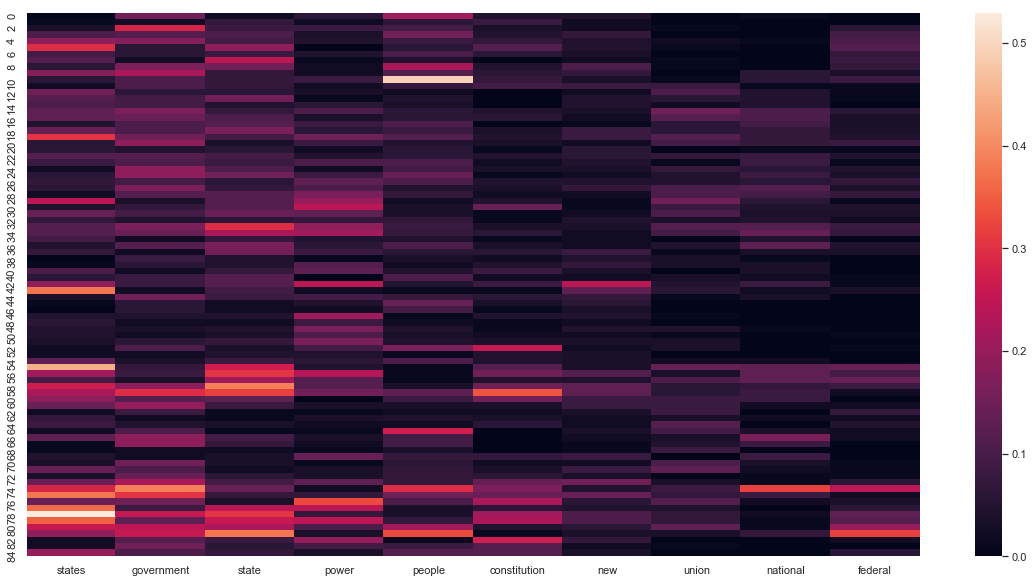

In [63]:
mw1 = mostWords(final_df)
mw1_words = mw1.index.values[0:10]
final_df.loc[:,mw1_words]

plt.figure(figsize=(20,10))
sns.heatmap(final_df.loc[:,mw1_words])
plt.savefig('heat_01.png')

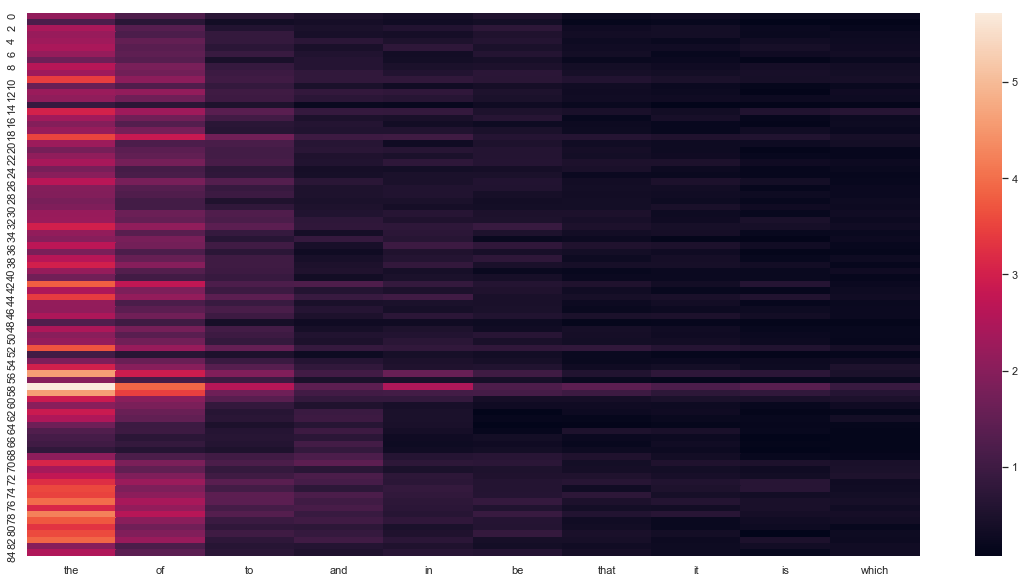

In [64]:
mw2 = mostWords(final_df_02)
mw2_words = mw2.index.values[0:10]
final_df_02.loc[:,mw2_words]

plt.figure(figsize=(20,10))
sns.heatmap(final_df_02.loc[:,mw2_words])
plt.savefig('heat_02.png')

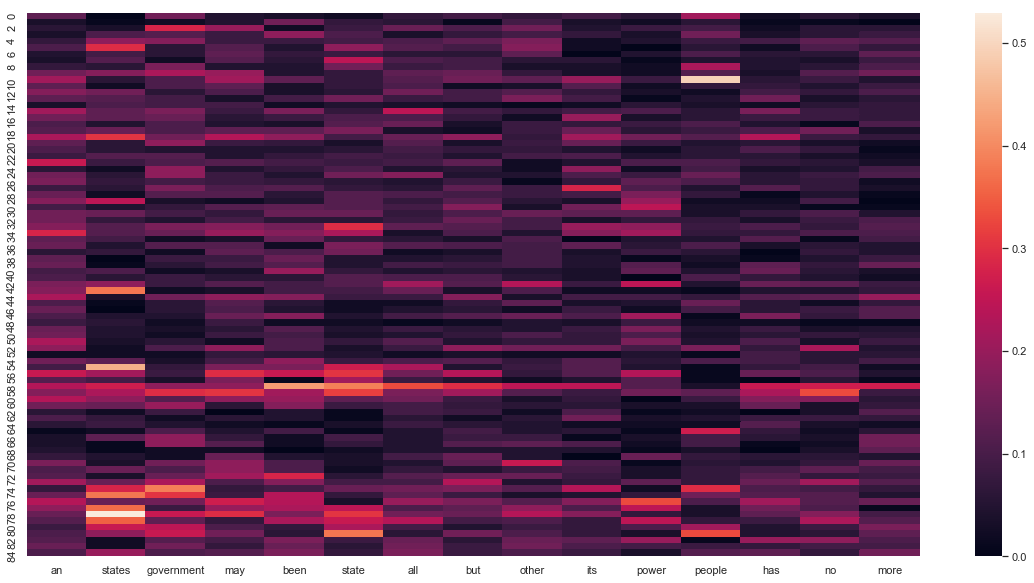

In [65]:
mw3_words = mw2.index.values[25:40]
final_df_02.loc[:,mw3_words]

plt.figure(figsize=(20,10))
sns.heatmap(final_df_02.loc[:,mw3_words])
plt.savefig('heat_03.png')

In [66]:
mw1.index.values

array(['states', 'government', 'state', 'power', 'people', 'constitution',
       'new', 'union', 'national', 'federal', 'authority', 'great',
       'public', 'ought', 'general', 'powers', 'shall', 'executive',
       'time', 'united', 'men', 'members', 'number', 'body', 'particular',
       'subject', 'legislative', 'different', 'york', 'laws', 'necessary',
       'representatives', 'legislature', 'senate', 'convention', 'cases',
       'governments', 'citizens', 'case', 'plan', 'far', 'proper',
       'common', 'rights', 'foreign', 'law', 'liberty', 'influence',
       'interests', 'proposed', 'place', 'objects', 'man', 'danger',
       'little', 'good', 'nature', 'courts', 'nations', 'form',
       'political', 'greater', 'make', 'president', 'war', 'country',
       'provision', 'congress', 'force', 'necessity', 'security',
       'america', 'means', 'peace', 'reason', 'respect', 'circumstances',
       'single', 'causes', 'course', 'present', 'principle', 'court',
       'situati

In [67]:
mw2.index.values

array(['the', 'of', 'to', 'and', 'in', 'be', 'that', 'it', 'is', 'which',
       'by', 'as', 'this', 'would', 'for', 'have', 'will', 'or', 'not',
       'from', 'their', 'with', 'are', 'on', 'they', 'an', 'states',
       'government', 'may', 'been', 'state', 'all', 'but', 'other', 'its',
       'power', 'people', 'has', 'no', 'more', 'at', 'if', 'than', 'them',
       'one', 'any', 'those', 'constitution', 'can', 'we', 'these',
       'there', 'must', 'who', 'such', 'so', 'most', 'upon', 'new',
       'union', 'same', 'his', 'should', 'every', 'national', 'was',
       'against', 'federal', 'might', 'under', 'our', 'into', 'only',
       'were', 'authority', 'great', 'had', 'public', 'ought', 'some',
       'general', 'powers', 'shall', 'executive', 'between', 'time',
       'each', 'could', 'united', 'men', 'less', 'what', 'members',
       'number', 'part', 'well', 'body', 'particular', 'us', 'first',
       'subject', 'legislative', 'two', 'he', 'different', 'without',
       'york

In [68]:
count = 0
for word in mw1.index.values:
    if word in mw2.index.values:
        count = count+1

print(count/len(mw1.index.values))

0.34782608695652173
